In [4]:
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import pandas_profiling as pp

# Downloading data

In [5]:
train = pd.read_csv('heart_train.csv')
test = pd.read_csv('heart_test.csv')
train.shape, test.shape

((242, 14), (61, 14))

# Concatenation

In [6]:
data = pd.concat([train, test])
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


# Column types

In [7]:
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print('Numerical columns: {}'.format(numeric))
categorical = ['cp', 'restecg', 'slope', 'thal', 'ca']
print('Categorical columns: {}'.format(categorical))
boolean = ['sex', 'fbs', 'exang', 'target']
print('Boolean columns: {}'.format(boolean))

Numerical columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical columns: ['cp', 'restecg', 'slope', 'thal', 'ca']
Boolean columns: ['sex', 'fbs', 'exang', 'target']


# Numeric columns distributions

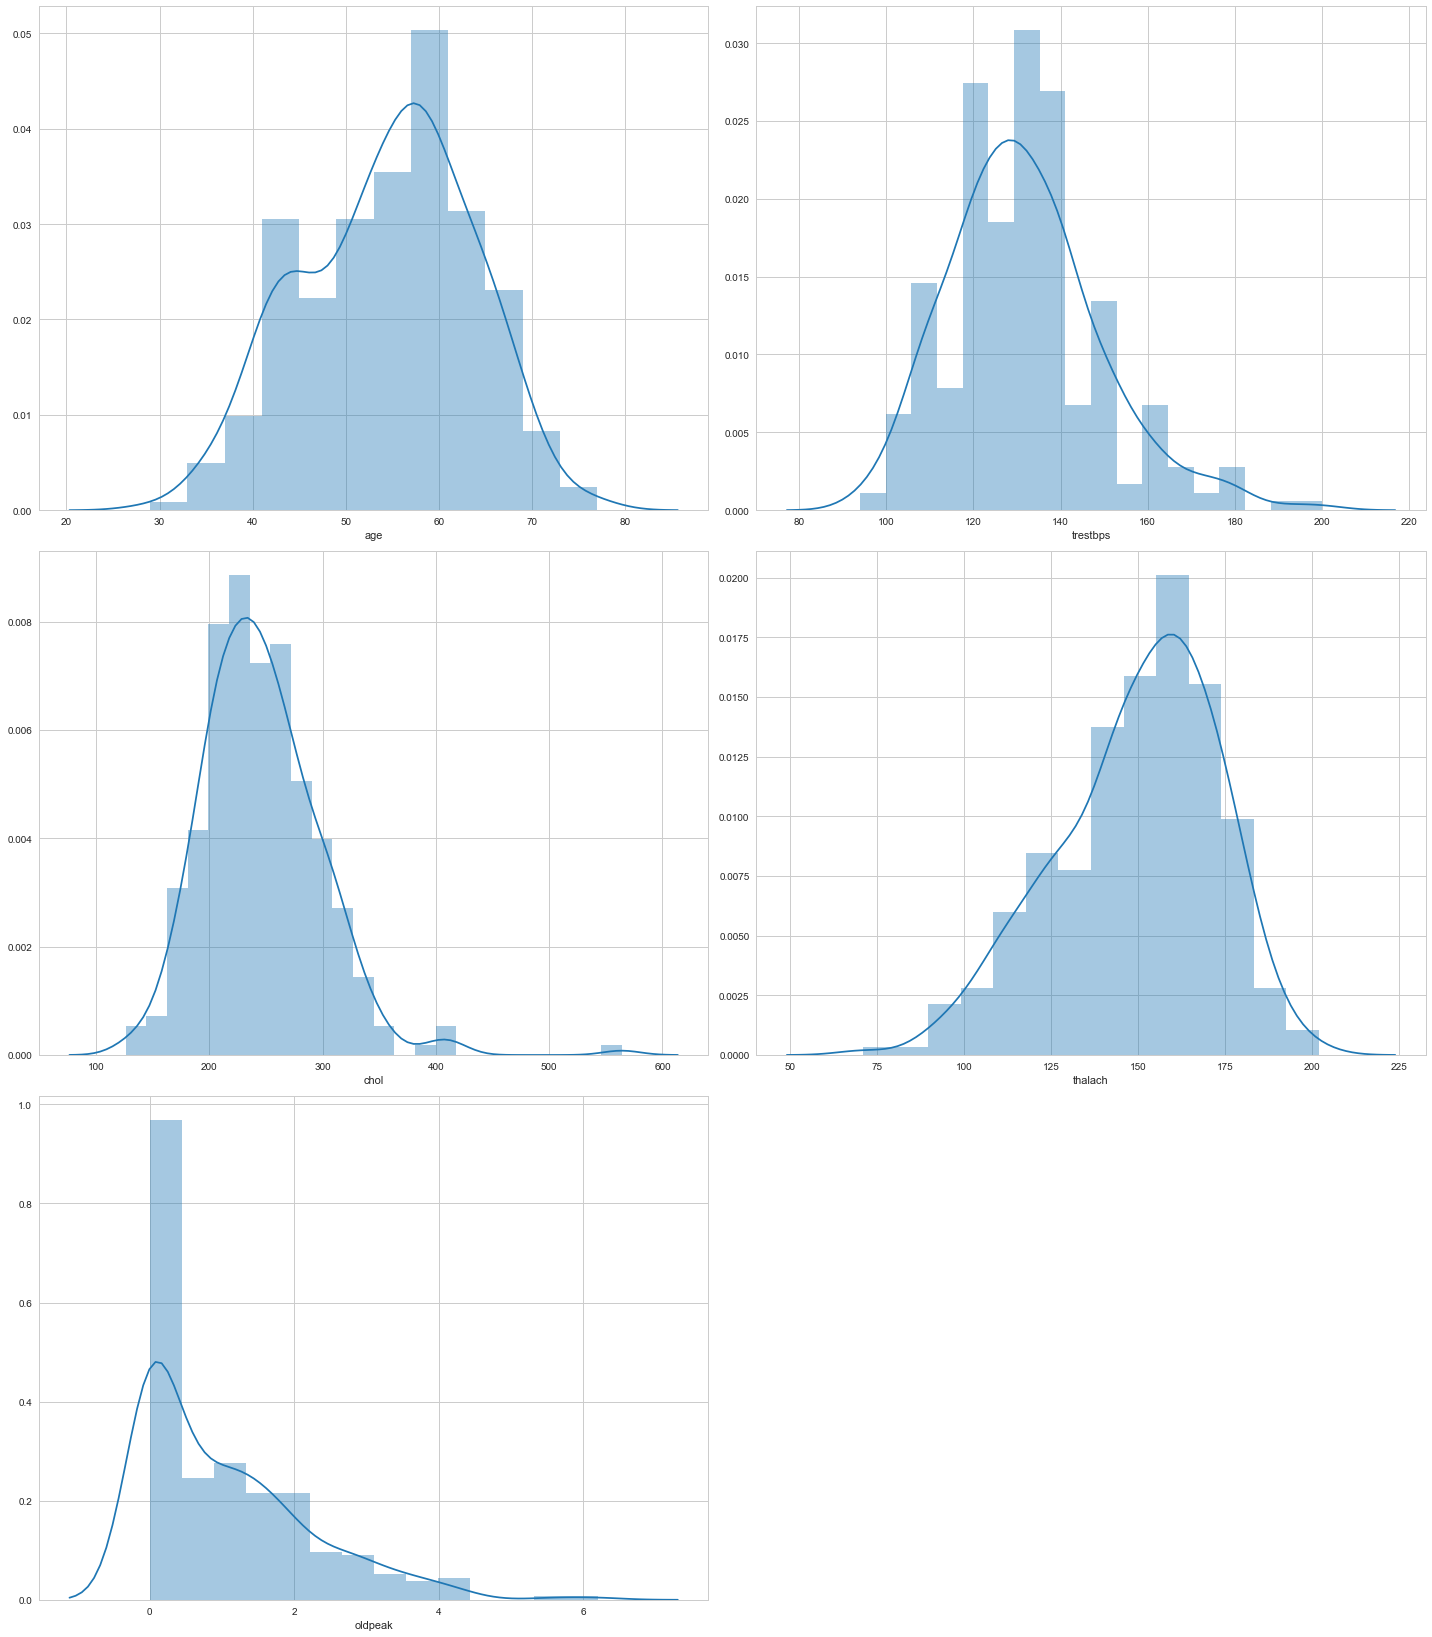

In [8]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,30))
for i in range(len(numeric)):
    # Set up the plot
    ax = plt.subplot(4, 2, i + 1)
    # Draw the plot
    #ax.hist(data[numeric[i]],color = 'green', edgecolor = 'black')
    sns.distplot(data[numeric[i]])
    ax.set_xlabel(numeric[i])
fig.tight_layout()

# Categorical and boolean columns analysis

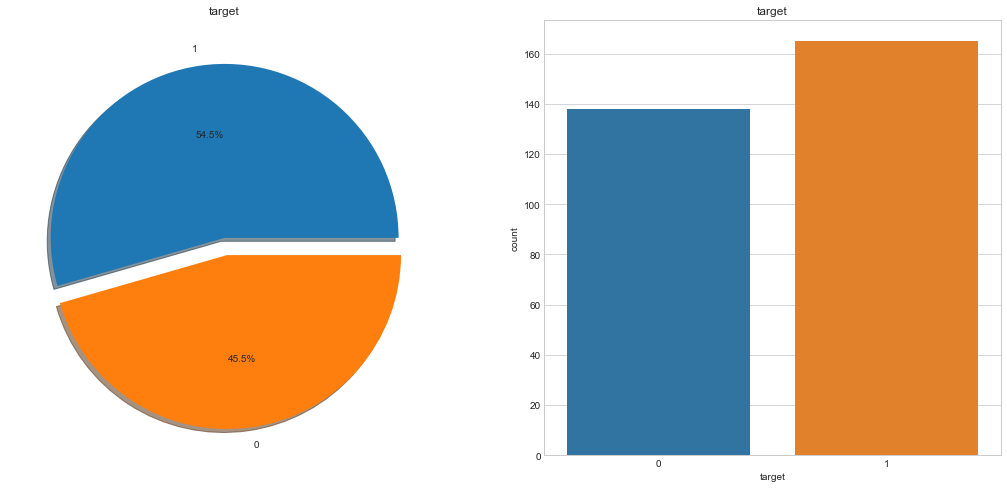

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=data,ax=ax[1])
ax[1].set_title('target')
plt.show()

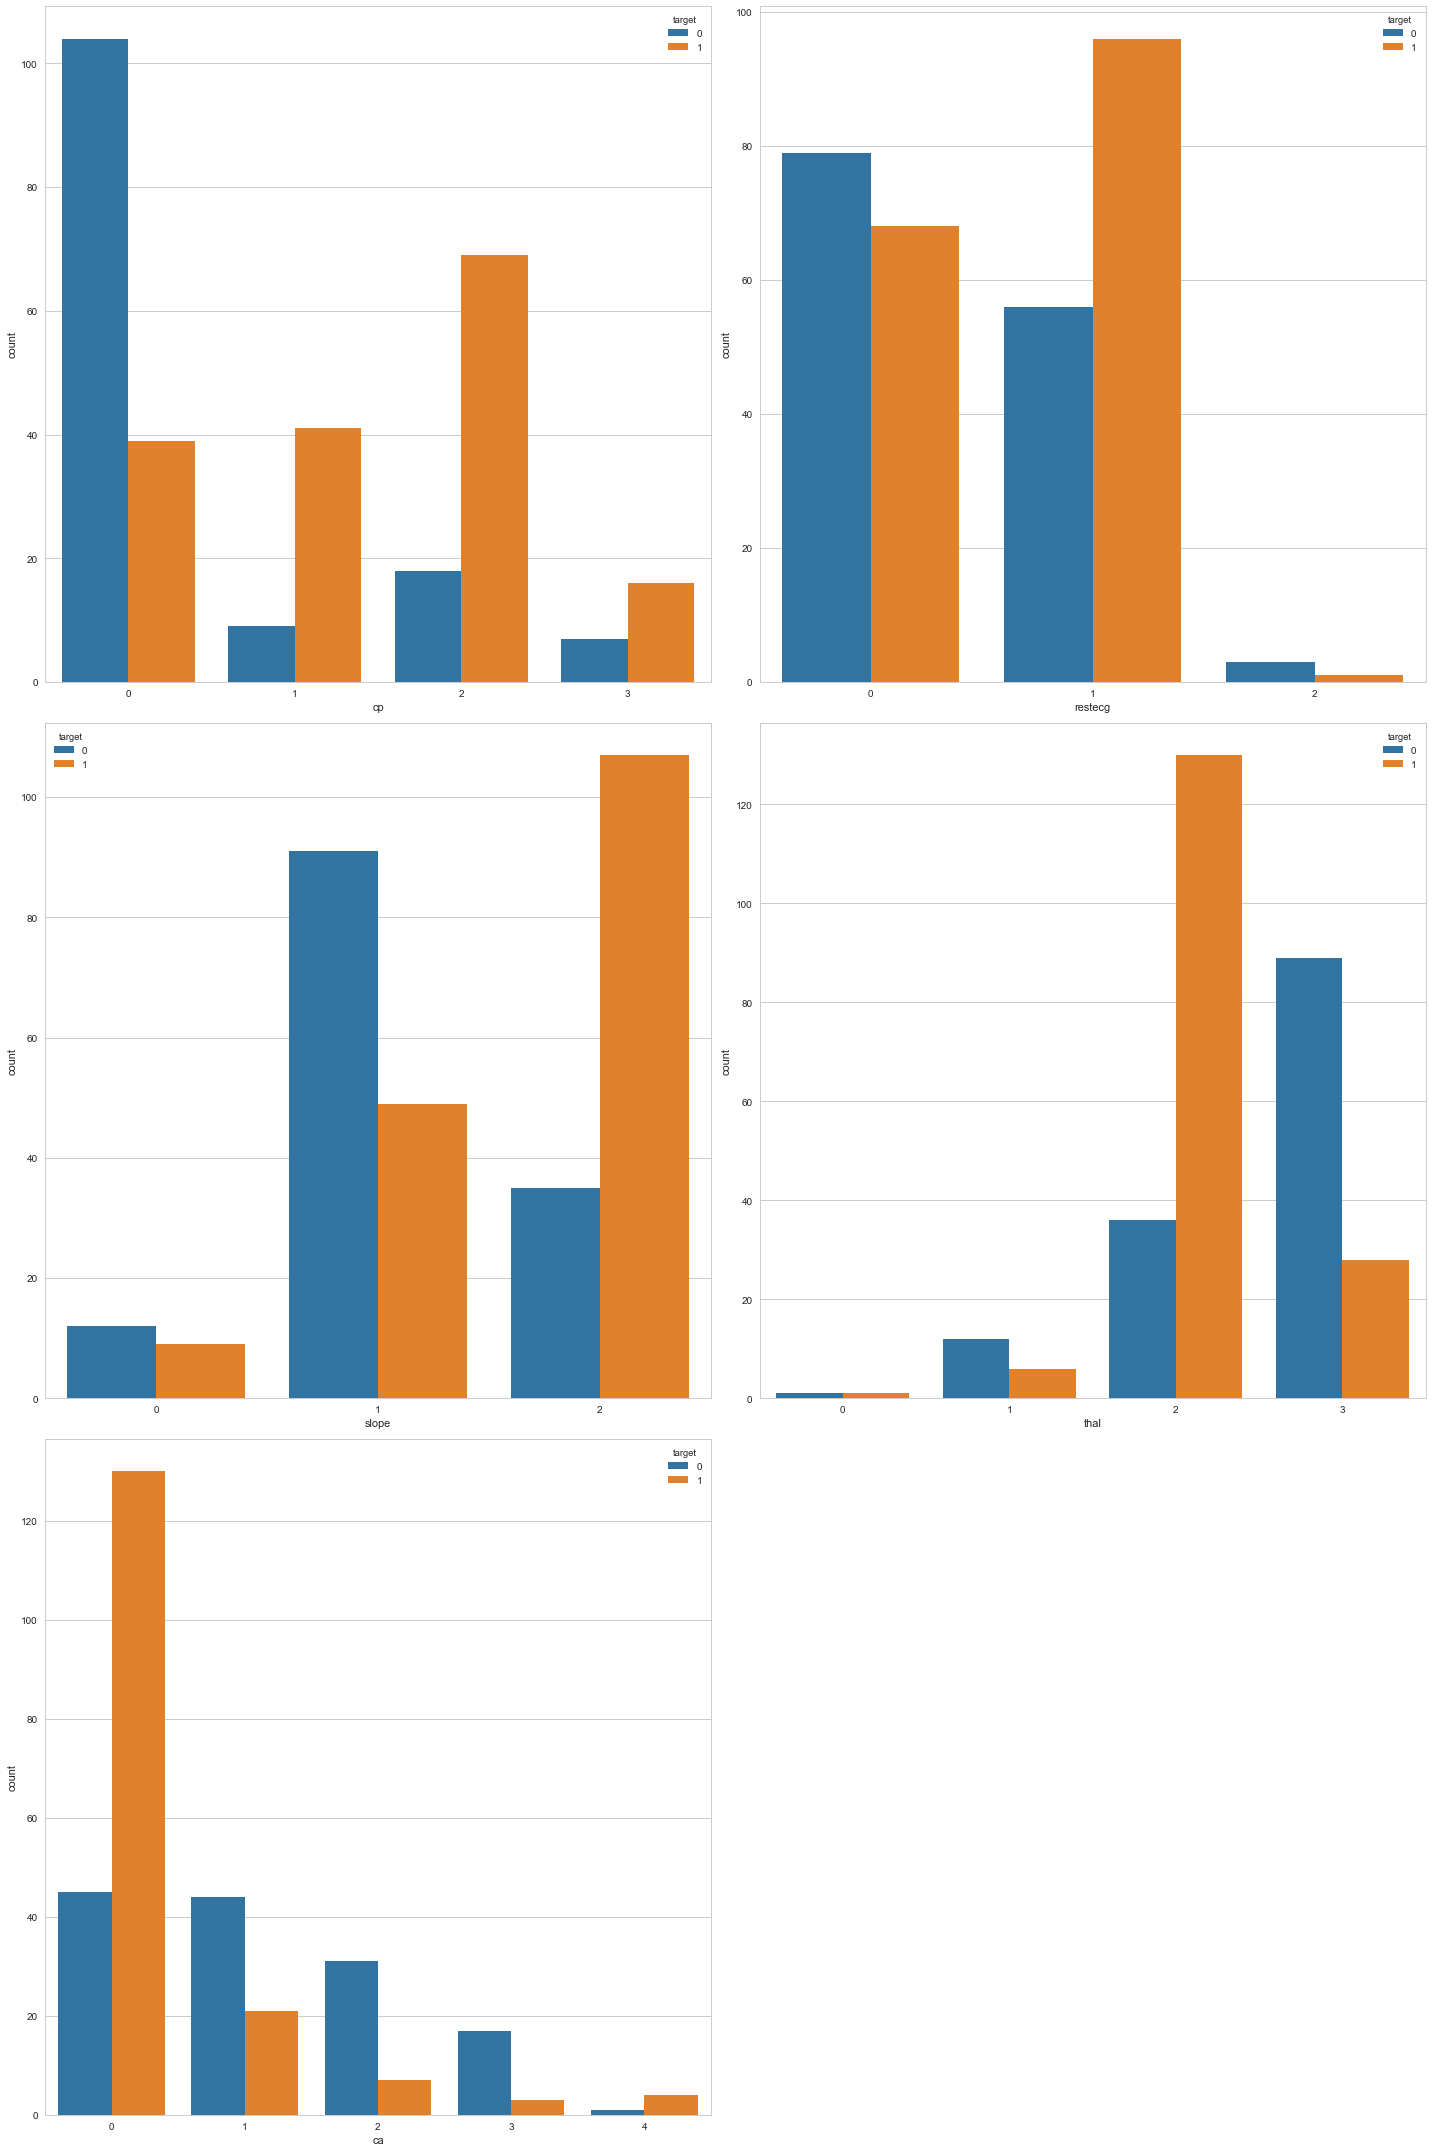

In [28]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,30))
for i in range(len(categorical)):
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    #sns.countplot(x="class", data=data, hue='target', ax=ax[i])
    sns.countplot(data[categorical[i]], hue=data['target'])
fig.tight_layout()

# Correlations map

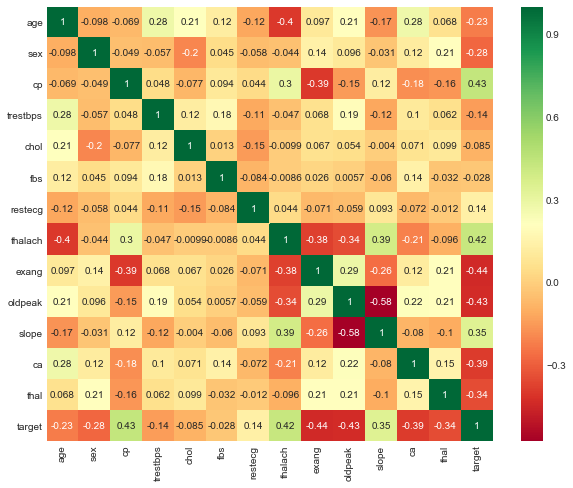

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Scaling some features

In [16]:
scaler = StandardScaler()
data[['age', 'trestbps', 'chol','thalach', 'oldpeak']] = scaler.fit_transform(data[['age', 'trestbps', 'chol','thalach', 'oldpeak']])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
pp.ProfileReport(data)

Number of variables,15
Number of observations,303
Total Missing (%),0.0%
Total size in memory,35.6 KiB
Average record size in memory,120.3 B
Numeric,11
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


# Summing up
I would base my assumptions of which columns to use on heatmap as it shows linear relation between the columns. Taking 'target' column it worth considering: cp, thalach, slope, exang, oldpeak, ca, thal, age and sex as they are quite correlated with the target either by direct dependency, either by reverse dependancy